# Car Prices

In [877]:
import pandas as pd
import matplotlib.pyplot as plt

In [878]:
import requests

# UC Irvine Machine Learning Repository
# http://archive.ics.uci.edu/ml/datasets/Automobile

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
data = requests.get(url)

In [879]:
header = [
    'symboling',
    'normalized-losses',
    'make',
    'fuel-type',
    'aspiration',
    'num-of-doors',
    'body-style',
    'drive-wheels',
    'engine-location',
    'wheel-base',
    'length',
    'width',
    'height',
    'curb-weight',
    'engine-type',
    'num-of-cylinders',
    'engine-size',
    'fuel-system',
    'bore',
    'stroke',
    'compression-ratio',
    'horsepower',
    'peak-rpm',
    'city-mpg',
    'highway-mpg',
    'price',

]

In [880]:
from io import StringIO

df = pd.read_csv(
    StringIO(data.text), 
    names=header,
    sep=","
) 

In [881]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [882]:
df = df.applymap(
    lambda cell: np.nan if cell == '?' else cell
)

In [883]:
cols_with_missing = df.isnull().sum()

In [884]:
cols_with_missing[
    cols_with_missing > 0
]

normalized-losses    41
num-of-doors          2
bore                  4
stroke                4
horsepower            2
peak-rpm              2
price                 4
dtype: int64

In [885]:
df = df[~df['price'].isnull()]

In [886]:
df.drop(labels=['normalized-losses'], axis=1, inplace=True)

In [887]:
df.columns

Index(['symboling', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [888]:
# pd.set_option('display.max_columns', None)
pd.set_option('display.max_columns', 10)

In [889]:
df.head(5)

,symboling,make,fuel-type,aspiration,num-of-doors,...,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,...,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,...,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,...,154,5000,19,26,16500
3,2,audi,gas,std,four,...,102,5500,24,30,13950
4,2,audi,gas,std,four,...,115,5500,18,22,17450


In [890]:
features = {
    'categorical': [
        'make', 'fuel-type', 'aspiration', 'num-of-doors', 
        'body-style', 'drive-wheels', 'engine-location', 
        'engine-type', 'num-of-cylinders', 'fuel-system',
        
    ],
    'numerical': [
        'symboling', 'wheel-base', 'length', 'width', 'height', 
        'curb-weight', 'engine-size', 'bore', 'stroke', 
        'compression-ratio', 'horsepower', 'peak-rpm', 
        'city-mpg', 'highway-mpg', 
    ],
}

features['all'] = features['categorical'] + features['numerical']

target = 'price'

In [891]:
df[features['numerical']] = df[features['numerical']].astype(np.float64)
df[target] = df[target].astype(np.float64) / 1000

In [892]:
df[features['categorical']].sample(n=3)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
191,volkswagen,gas,std,four,sedan,fwd,front,ohc,five,mpfi
96,nissan,gas,std,four,sedan,fwd,front,ohc,four,2bbl
177,toyota,gas,std,four,hatchback,fwd,front,ohc,four,mpfi


In [893]:
df[features['numerical']].head(3)

,symboling,wheel-base,length,width,height,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3.0,88.6,168.8,64.1,48.8,...,9.0,111.0,5000.0,21.0,27.0
1,3.0,88.6,168.8,64.1,48.8,...,9.0,111.0,5000.0,21.0,27.0
2,1.0,94.5,171.2,65.5,52.4,...,9.0,154.0,5000.0,19.0,26.0


In [894]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.25, random_state=22)

In [895]:
x_train = df_train[features['all']]
x_test  = df_test[features['all']]

y_train = df_train[target]
y_test  = df_test[target]

In [896]:
y_train.describe()

count    150.000000
mean      13.724267
std        8.224519
min        5.118000
25%        7.961500
50%       11.072000
75%       16.678750
max       45.400000
Name: price, dtype: float64

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


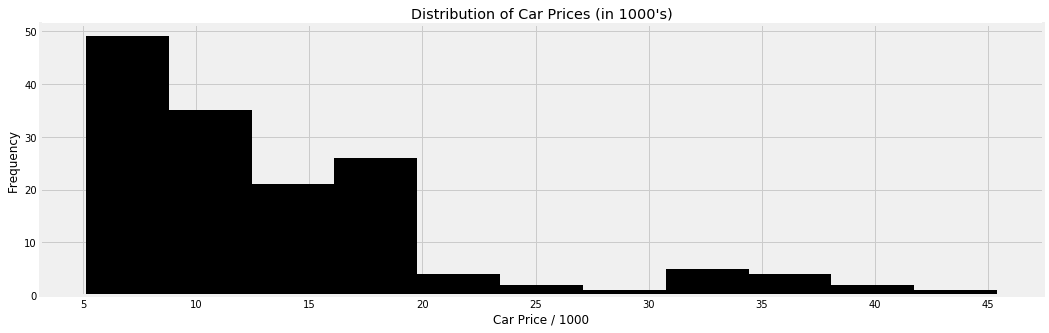

In [897]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5), sharey=False)

y_train.plot(
    title="Distribution of Car Prices (in 1000's)",
    kind='hist', 
    bins=11,
    color='k',
    ax=ax
)

ax.set_xlabel('Car Price / 1000')

fig.show()

In [898]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

x_train = imp.fit_transform(x_train)
x_test = imp.transform(x_test)

x_train = pd.DataFrame(x_train, columns=features['all'])
x_test = pd.DataFrame(x_test, columns=features['all'])

In [899]:
class ColumnNamesKeeper:
    
    def __init__(self, transformer):
        self._columns = None
        self.transformer = transformer
        
    def __repr__(self):
        return repr(self.transformer)
    
    def fit(self, x, y=None):
        self._columns = x.columns
        self.transformer.fit(x)
    
    def transform(self, x, y=None):
        x = self.transformer.transform(x)
        return pd.DataFrame(x, columns=self._columns)
        
    def fit_transform(self, x, y=None):
        self.fit(x, y)
        return self.transform(x)

In [900]:
from sklearn.impute import SimpleImputer

imp = ColumnNamesKeeper(
    SimpleImputer(missing_values=np.nan, strategy='most_frequent')
)

x_train = imp.fit_transform(x_train)
x_test = imp.transform(x_test)

In [901]:
print(
    'Missing values in train: {}, and in test: {}'.format(
        x_train.isnull().sum().sum(),
        x_test.isnull().sum().sum(),
    )
) 

Missing values in train: 0, and in test: 0


In [902]:
x_train.head(4)

,make,fuel-type,aspiration,num-of-doors,body-style,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,volkswagen,diesel,std,four,sedan,...,23,52,4800,37,46
1,mercury,gas,turbo,two,hatchback,...,8,175,5000,19,24
2,nissan,gas,std,four,wagon,...,9.4,69,5200,31,37
3,toyota,gas,std,two,hatchback,...,9.3,161,5200,20,24


In [922]:
from category_encoders.ordinal import OrdinalEncoder

enc = OrdinalEncoder(
    cols=features['categorical'],
    handle_unknown='value'
)

x_train = enc.fit_transform(x_train)
x_test = enc.transform(x_test)

In [923]:
x_train.head(4)

,make,fuel-type,aspiration,num-of-doors,body-style,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,1,1,1,1,1,...,23,52,4800,37,46
1,2,2,2,2,2,...,8,175,5000,19,24
2,3,2,1,1,3,...,9.4,69,5200,31,37
3,4,2,1,2,2,...,9.3,161,5200,20,24


## Random Forest

In [924]:
from sklearn.ensemble import RandomForestRegressor

rgr = RandomForestRegressor(n_jobs=-1)

rgr.fit(x_train, y_train)
y_test_pred = rgr.predict(x_test)

In [925]:
print(rgr)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [926]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

print(
    'R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE {:.2f}'.format(
        r2_score(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_pred),
        np.sqrt(mean_squared_error(y_test, y_test_pred)),
        mean_absolute_error(y_test, y_test_pred),
    )
)

R2: 0.91, MSE: 4.16, RMSE: 2.04, MAE 1.31


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


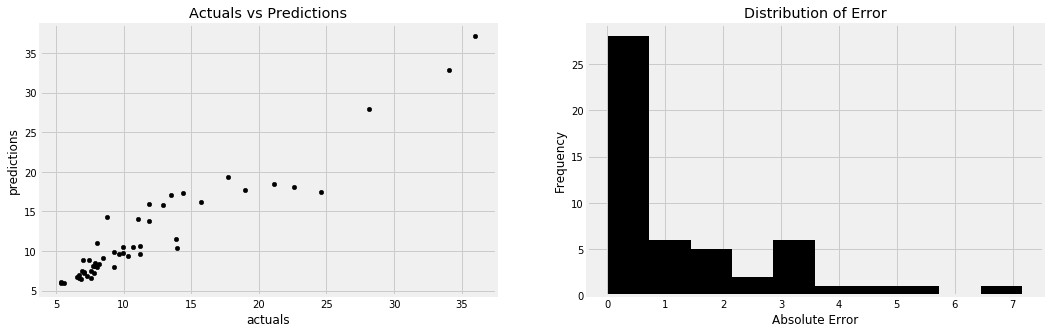

In [993]:
df_pred = pd.DataFrame(
    {
        'actuals': y_test,
        'predictions': y_test_pred,
    }
)

df_pred['error'] = np.abs(y_test - y_test_pred)

fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharey=False)

df_pred.plot(
    title='Actuals vs Predictions',
    kind='scatter',
    x='actuals',
    y='predictions',
    color='k',
    ax=axs[0],
)

df_pred['error'].plot(
    title='Distribution of Error',
    kind='hist',
    color='k',
    ax=axs[1],
)

axs[1].set_xlabel('Absolute Error')

fig.show()

In [997]:
pd.set_option('display.max_rows', 8)

In [998]:
df_feature_importances = pd.DataFrame(
    {
        'Feature': x_train.columns,
        'Importance': rgr.feature_importances_,
    }
).sort_values(
    'Importance', ascending=False
)

df_feature_importances

,Feature,Importance
16,engine-size,0.508621
15,curb-weight,0.223342
20,horsepower,0.064801
23,highway-mpg,0.059187
...,...,...
10,symboling,0.001612
7,engine-type,0.001577
1,fuel-type,0.000707
6,engine-location,0.000643


In [999]:
pd.set_option('display.max_rows', 50)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


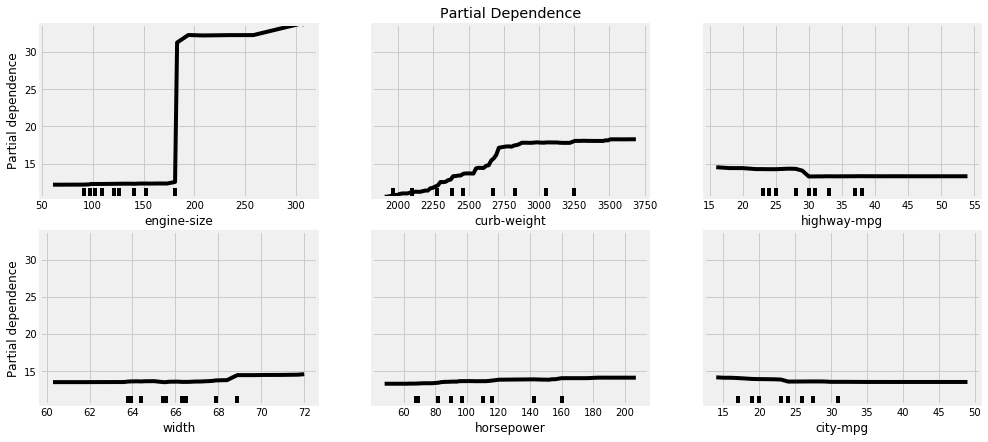

In [929]:
from sklearn.inspection import plot_partial_dependence

fig, ax = plt.subplots(1, 1, figsize=(15, 7), sharey=False)

top_features = df_feature_importances['Feature'].head(6)

plot_partial_dependence(
    rgr, x_train, 
    features=top_features,
    n_cols=3, 
    n_jobs=-1,
    line_kw={'color': 'k'},
    ax=ax
) 

ax.set_title('Partial Dependence')

fig.show()

In [930]:
# Shall I also write about permutation_importance.
# Tip: impurity-based feature importance can inflate the importance of numerical features.
# https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html

In [989]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)


mae = []
mse = []

n_estimators_options = [5, 500, 5000]

for n_estimators in n_estimators_options:

    rgr = RandomForestRegressor(
        n_estimators=n_estimators,
        bootstrap=True,
        max_features=0.75,
        max_samples=0.75,
        n_jobs=-1,
    )

    rgr.fit(x_train, y_train)
    y_test_pred = rgr.predict(x_test)
    
    mae.append(mean_absolute_error(y_test, y_test_pred))
    mse.append(mean_squared_error(y_test, y_test_pred))
    
df_error = pd.DataFrame(
    {
        'n_estimators': n_estimators_options,
        'MAE': mae,
        'MSE': mse
    }
).set_index('n_estimators')

In [990]:
df_error

,MAE,MSE
n_estimators,,
5,1.578502,5.859637
500,1.370528,4.255497
5000,1.376203,4.286996


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:13: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  del sys.path[0]


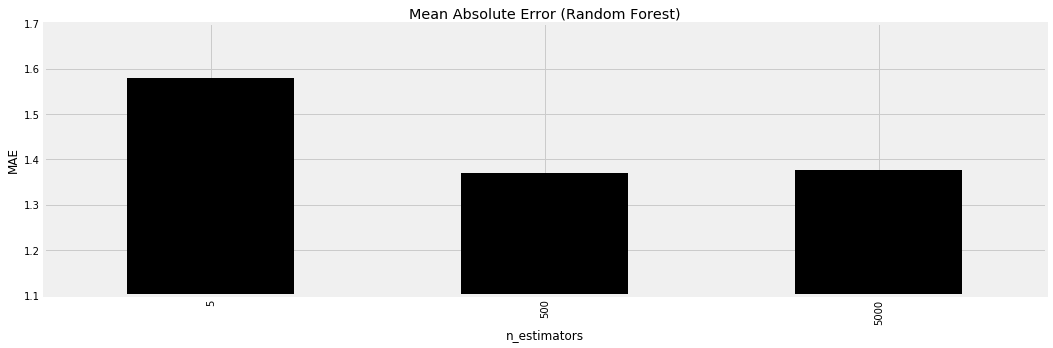

In [991]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5), sharey=False)

df_error['MAE'].plot(
    title="Mean Absolute Error (Random Forest)",
    kind='bar',
    ylim=(1.1,1.7),
    color='k',
    ax=ax
)

ax.set_ylabel('MAE')

fig.show()

## Bagging Regressor

In [819]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Compare to when K > 1; performance is worse then
rgr = BaggingRegressor(
    base_estimator=KNeighborsRegressor(n_neighbors=1),
    n_estimators=200,
)

rgr.fit(x_train, y_train)
y_test_pred = rgr.predict(x_test)

In [820]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

print(
    'R2: {:.2f}, MSE: {:.2f}, MAE: {:.2f}'.format(
        r2_score(df_test[target], y_test_pred),
        mean_squared_error(df_test[target], y_test_pred),
        mean_absolute_error(df_test[target], y_test_pred),
    )
)

R2: 0.82, MSE: 8.47, MAE: 1.79


In [821]:
class ColumnNamesKeeper:
    
    def __init__(self, transformer):
        self._columns = None
        self.transformer = transformer
        
    def __repr__(self):
        return repr(self.transformer)
    
    def fit(self, x, y=None):
        self._columns = x.columns
        self.transformer.fit(x)
    
    def transform(self, x, y=None):
        x = self.transformer.transform(x)
        return pd.DataFrame(x, columns=self._columns)
        
    def fit_transform(self, x, y=None):
        self.fit(x, y)
        return self.transform(x)

In [1001]:
from sklearn.impute import SimpleImputer
from category_encoders.one_hot import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

numerical_mputer = ColumnNamesKeeper(
    SimpleImputer(
        missing_values=np.nan, 
        strategy='median'
    )
)

categorical_mputer = ColumnNamesKeeper(
    SimpleImputer(
        missing_values=np.nan, 
        strategy='most_frequent'
    )
)

minmax_scaler = ColumnNamesKeeper(
    MinMaxScaler()
) 

onehot_encoder = OneHotEncoder(
    cols=features['categorical'],
    handle_unknown='value'
)

numerical_pipeline = Pipeline(
    [
        ('numerical_mputer', numerical_mputer), 
        ('minmax_scaler', minmax_scaler)
    ]
)

categorical_pipeline = Pipeline(
    [
        ('categorical_mputer', categorical_mputer), 
        ('onehot_encoder', onehot_encoder)
    ]
)

x_train_knn = pd.concat(
    [
        numerical_pipeline.fit_transform(df_train[features['numerical']]), 
        categorical_pipeline.fit_transform(df_train[features['categorical']]),
    ],
    axis=1
)

x_test_knn = pd.concat(
    [
        numerical_pipeline.transform(df_test[features['numerical']]), 
        categorical_pipeline.transform(df_test[features['categorical']]),
    ],
    axis=1
)

In [1004]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

rgr = BaggingRegressor(
    base_estimator=KNeighborsRegressor(
        n_neighbors=1
    ),
    n_estimators=400,
)

rgr.fit(x_train_knn, y_train)
y_test_pred = rgr.predict(x_test_knn)

In [1005]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

print(
    'R2: {:.2f}, MSE: {:.2f}, MAE: {:.2f}'.format(
        r2_score(df_test[target], y_test_pred),
        mean_squared_error(df_test[target], y_test_pred),
        mean_absolute_error(df_test[target], y_test_pred),
    )
)

R2: 0.86, MSE: 6.50, MAE: 1.78


In [1006]:
rgr = KNeighborsRegressor(
    n_neighbors=3
)

rgr.fit(x_train_knn, y_train)
y_test_pred = rgr.predict(x_test_knn)

In [1007]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

print(
    'R2: {:.2f}, MSE: {:.2f}, MAE: {:.2f}'.format(
        r2_score(df_test[target], y_test_pred),
        mean_squared_error(df_test[target], y_test_pred),
        mean_absolute_error(df_test[target], y_test_pred),
    )
)

R2: 0.87, MSE: 6.09, MAE: 1.84


## Gradient Boosting

In [1101]:
from sklearn.ensemble import GradientBoostingRegressor

rgr = GradientBoostingRegressor(n_estimators=1000, max_depth=3, learning_rate=0.01, loss='ls')

rgr.fit(x_train, y_train)
y_test_pred = rgr.predict(x_test)

In [1102]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

print(
    'R2: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, MAE: {:.2f}'.format(
        r2_score(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_pred),
        np.sqrt(mean_squared_error(y_test, y_test_pred)),
        mean_absolute_error(y_test, y_test_pred),
    )
)

R2: 0.92, MSE: 3.93, RMSE: 1.98, MAE: 1.42


In [1010]:
# Random Forest
# R2: 0.91, MSE: 4.16, RMSE: 2.04, MAE 1.31

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


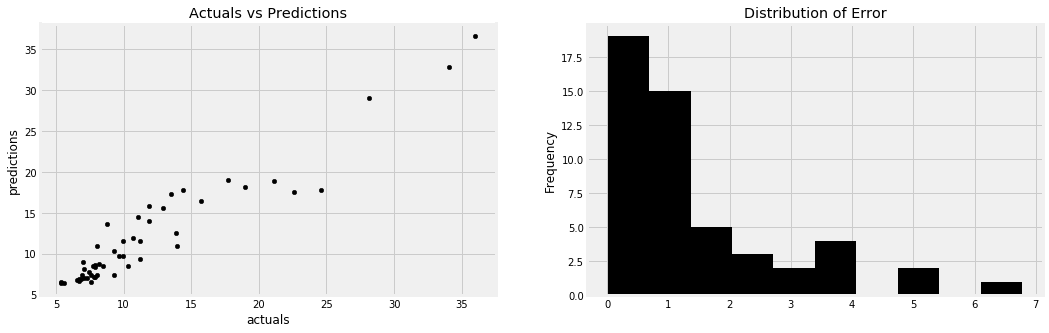

In [1011]:
df_pred = pd.DataFrame(
    {
        'actuals': y_test,
        'predictions': y_test_pred,
    }
)

df_pred['error'] = np.abs(y_test - y_test_pred)

fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharey=False)

df_pred.plot(
    title='Actuals vs Predictions',
    kind='scatter',
    x='actuals',
    y='predictions',
    color='k',
    ax=axs[0],
)

df_pred['error'].plot(
    title='Distribution of Error',
    kind='hist',
    color='k',
    ax=axs[1],
)

fig.show()

In [1012]:
df_feature_importances = pd.DataFrame(
    {
        'Feature': x_train.columns,
        'Importance': rgr.feature_importances_,
    }
).sort_values(
    'Importance', ascending=False
)

df_feature_importances.head(8)

,Feature,Importance
16,engine-size,0.673345
15,curb-weight,0.186223
20,horsepower,0.028108
23,highway-mpg,0.019934
9,fuel-system,0.019105
22,city-mpg,0.012323
13,width,0.011618
11,wheel-base,0.007101


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


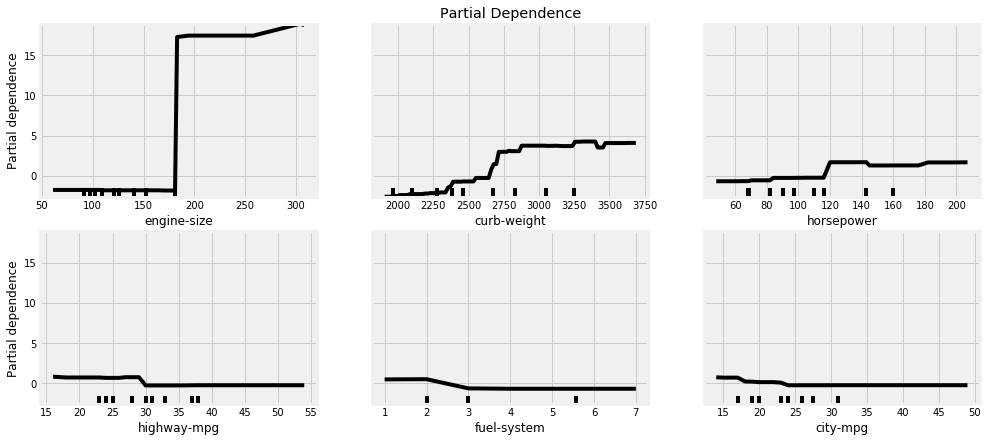

In [1013]:
from sklearn.inspection import plot_partial_dependence

fig, ax = plt.subplots(1, 1, figsize=(15, 7), sharey=False)

top_features = df_feature_importances['Feature'].head(6)

plot_partial_dependence(
    rgr, x_train, 
    features=top_features,
    n_cols=3, 
    n_jobs=-1,
    line_kw={'color': 'k'},
    ax=ax
) 

ax.set_title('Partial Dependence')

fig.show()

## Deviance

In [1063]:
from sklearn.ensemble import GradientBoostingRegressor

rgr = GradientBoostingRegressor(n_estimators=250, learning_rate=0.02, loss='ls')
rgr.fit(x_train, y_train)
y_test_pred = rgr.predict(x_test)

print(f'MSE: {mean_squared_error(y_test, y_test_pred)}')

MSE: 4.28460722994568


In [1064]:
def calculate_deviance(estimator, x_test, y_test):

    train_errors = estimator.train_score_
    test_errors = [
        estimator.loss_(y_test, y_pred_staged) # mean_squared_error(y_test, y_pred_staged)
        for y_pred_staged in estimator.staged_predict(x_test)
    ]

    return pd.DataFrame(
        {
            'n_estimators': range(1, estimator.estimators_.shape[0]+1),
            'train_error': train_errors,
            'test_error': test_errors,
        }
    ).set_index('n_estimators')

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


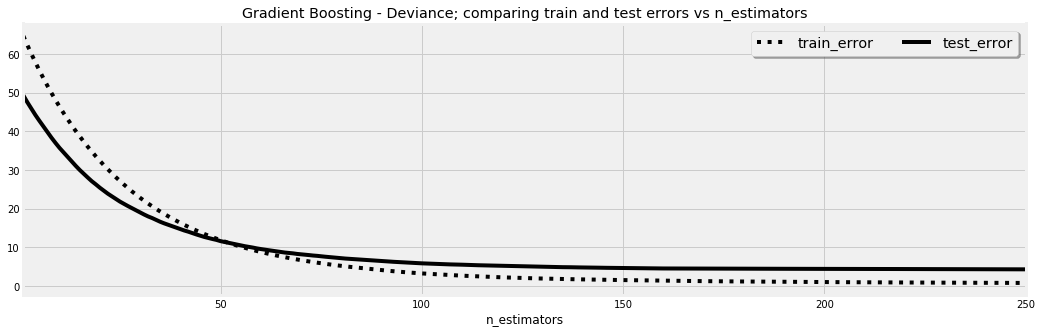

In [1065]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5), sharey=False)

df_deviance = calculate_deviance(rgr, x_test, y_test)

df_deviance['train_error'].plot(
    kind='line',
    color='k',
    linestyle=':',
    ax=ax
)

df_deviance['test_error'].plot(
    kind='line',
    color='k',
    linestyle='-',
    ax=ax
)

ax.set_title('Gradient Boosting - Deviance; comparing train and test errors vs n_estimators')

ax.legend(ncol=2, fontsize='x-large', shadow=True)

fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:35: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


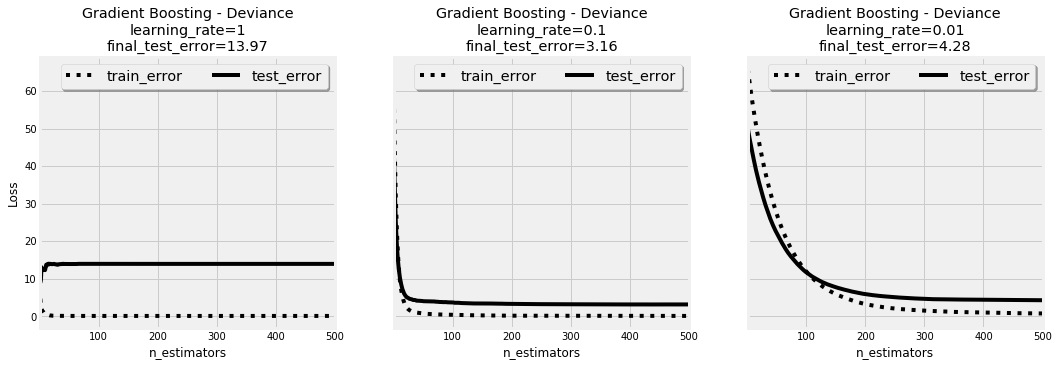

In [1076]:
learning_rates = [1, 0.1, 0.01]

fig, axs = plt.subplots(1, len(learning_rates), figsize=(16, 5), sharey=True)

for i, learning_rate in enumerate(learning_rates):
    
    rgr = GradientBoostingRegressor(n_estimators=500, learning_rate=learning_rate, loss='ls')
    rgr.fit(x_train, y_train)
    y_test_pred = rgr.predict(x_test)

    final_test_error = mean_squared_error(y_test, y_test_pred)

    df_deviance = calculate_deviance(rgr, x_test, y_test)

    df_deviance['train_error'].plot(
        title='Gradient Boosting - Deviance',
        kind='line',
        color='k',
        linestyle=':',
        ax=axs[i]
    )

    df_deviance['test_error'].plot(
        title=f'Gradient Boosting - Deviance\nlearning_rate={learning_rate}\nfinal_test_error={final_test_error:.2f}',
        kind='line',
        color='k',
        linestyle='-',
        ax=axs[i]
    )

    axs[i].set_ylabel('Loss')

    axs[i].legend(ncol=2, fontsize='x-large', shadow=True)

fig.show()

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


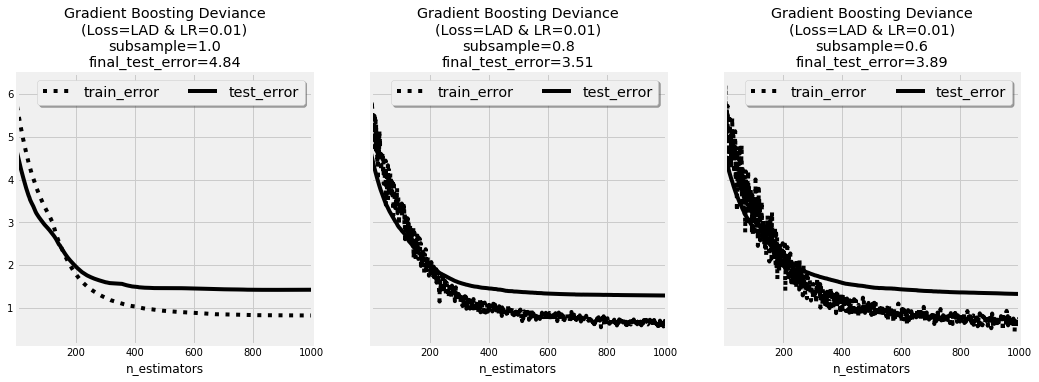

In [1083]:
subsamples = [1.0, 0.8, 0.6]

fig, axs = plt.subplots(1, len(subsamples), figsize=(16, 5), sharey=True)

for i, subsample in enumerate(subsamples):
    
    loss = 'lad'
    learning_rate = 0.01
    
    rgr = GradientBoostingRegressor(
        n_estimators=1000, subsample=subsample, learning_rate=learning_rate, loss=loss
    )
    rgr.fit(x_train, y_train)
    y_test_pred = rgr.predict(x_test)

    final_test_error = mean_squared_error(y_test, y_test_pred)

    df_deviance = calculate_deviance(rgr, x_test, y_test)

    df_deviance['train_error'].plot(
        title='Gradient Boosting - Deviance',
        kind='line',
        color='k',
        linestyle=':',
        ax=axs[i]
    )

    df_deviance['test_error'].plot(
        title=f'Gradient Boosting Deviance\n(Loss={loss.upper()} & LR={learning_rate})\nsubsample={subsample}\nfinal_test_error={final_test_error:.2f}',
        kind='line',
        color='k',
        linestyle='-',
        ax=axs[i]
    )

    axs[i].legend(ncol=2, fontsize='x-large', shadow=True)

fig.show()

## Early Stopping
n_iter_no_change, tol

## Dynamic Learning Rate

In [1084]:
def lr_changer(n, estimator, params):
    if n % 10:
        estimator.learning_rate = 0.01
    else:
        estimator.learning_rate = 0.1
    return False

In [1085]:
from sklearn.ensemble import GradientBoostingRegressor

rgr = GradientBoostingRegressor(n_estimators=50, learning_rate=0.01, loss='ls')
rgr.fit(x_train, y_train, monitor=lr_changer)
y_test_pred = rgr.predict(x_test)

print(f'MSE: {mean_squared_error(y_test, y_test_pred)}')

MSE: 26.77124112219805


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


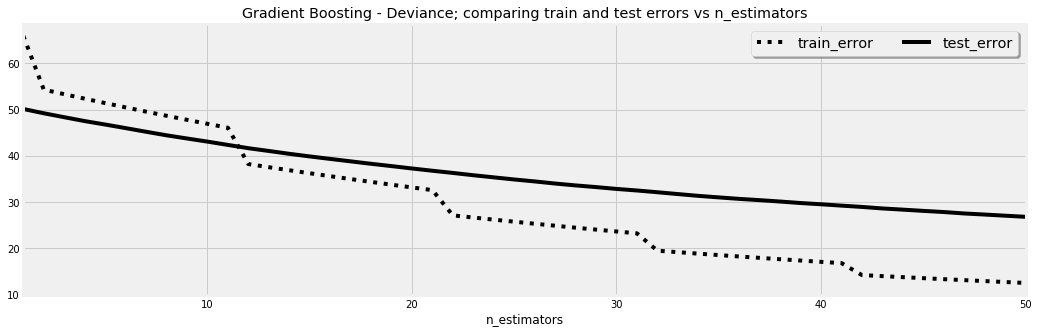

In [1087]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5), sharey=False)

df_deviance = calculate_deviance(rgr, x_test, y_test)

df_deviance['train_error'].plot(
    kind='line',
    color='k',
    linestyle=':',
    ax=ax
)

df_deviance['test_error'].plot(
    kind='line',
    color='k',
    linestyle='-',
    ax=ax
)

ax.set_title('Gradient Boosting - Deviance; comparing train and test errors vs n_estimators')

ax.legend(ncol=2, fontsize='x-large', shadow=True)

fig.show()

## Regression Ranges

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


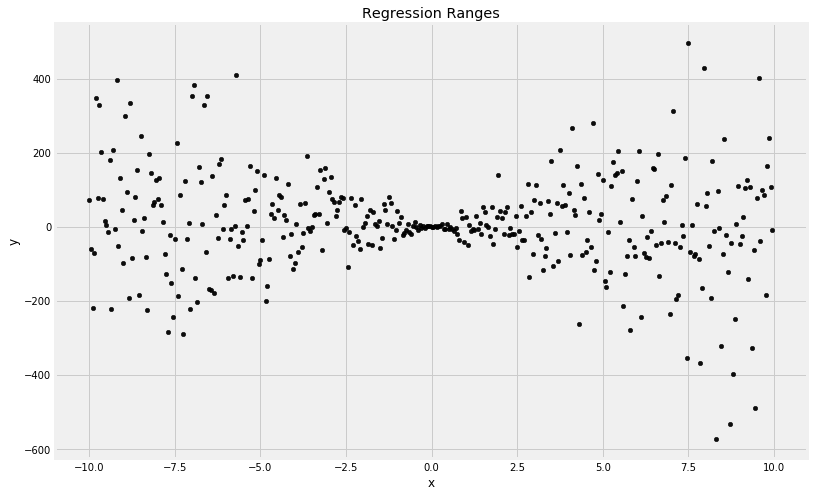

In [1022]:
x_sample = np.arange(-10, 10, 0.05)
y_sample = np.random.normal(loc=0, scale=25, size=x_sample.shape[0]) 
y_sample *= x_sample 

pd_random_samples = pd.DataFrame(
    {
        'x': x_sample,
        'y': y_sample
    }
)

fig, ax = plt.subplots(1, 1, figsize=(12, 8), sharey=False)

pd_random_samples.plot(
    title='Regression Ranges', kind='scatter', x='x', y='y', color='k', alpha=0.95, ax=ax
)

fig.show()

In [1089]:
pd_random_samples.shape

(400, 5)

In [1088]:
np.mean([10,20,22]), np.median([10,20,22])

(17.333333333333332, 20.0)

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


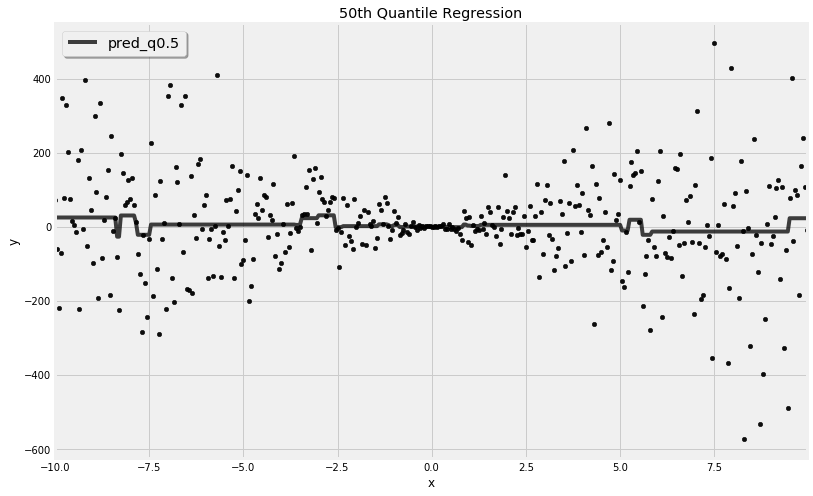

In [1023]:
from sklearn.ensemble import GradientBoostingRegressor

fig, ax = plt.subplots(1, 1, figsize=(12, 8), sharey=False)

pd_random_samples.plot(
    title='50th Quantile Regression', kind='scatter', x='x', y='y', color='k', alpha=0.95, ax=ax
)

for quantile in [0.5]:
    
    rgr = GradientBoostingRegressor(n_estimators=10, loss='quantile', alpha=quantile)
    rgr.fit(pd_random_samples[['x']], pd_random_samples['y'])
    pd_random_samples[f'pred_q{quantile}'] = rgr.predict(pd_random_samples[['x']])
    
    pd_random_samples.plot(
        kind='line', x='x', y=f'pred_q{quantile}', linestyle='-', alpha=0.75, color='k', ax=ax
    )
    
ax.legend(ncol=1, fontsize='x-large', shadow=True)

fig.show()
    

/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


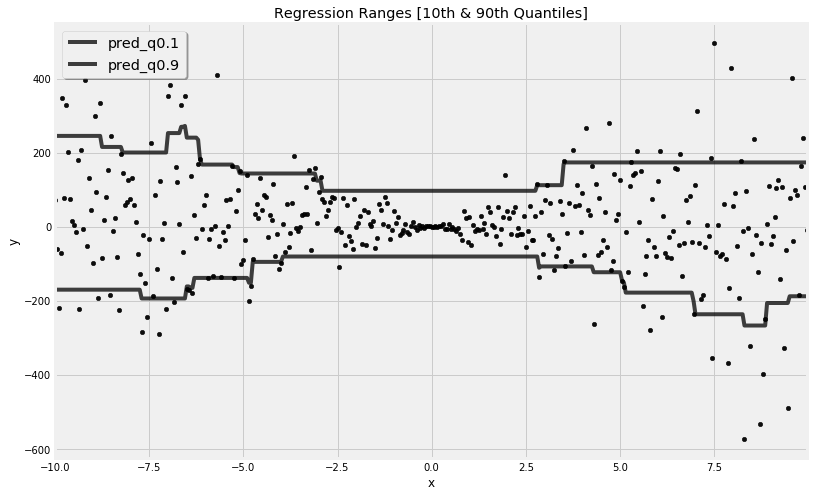

In [1024]:
from sklearn.ensemble import GradientBoostingRegressor

fig, ax = plt.subplots(1, 1, figsize=(12, 8), sharey=False)

pd_random_samples.plot(
    title='Regression Ranges [10th & 90th Quantiles]', kind='scatter', x='x', y='y', color='k', alpha=0.95, ax=ax
)

for quantile in [0.1, 0.9]:
    
    rgr = GradientBoostingRegressor(n_estimators=10, loss='quantile', alpha=quantile)
    rgr.fit(pd_random_samples[['x']], pd_random_samples['y'])
    pd_random_samples[f'pred_q{quantile}'] = rgr.predict(pd_random_samples[['x']])
    
    pd_random_samples.plot(
        kind='line', x='x', y=f'pred_q{quantile}', linestyle='-', alpha=0.75, color='k', ax=ax
    )
    
ax.legend(ncol=1, fontsize='x-large', shadow=True)

fig.show()
    

In [1025]:
## 

In [1026]:
from sklearn.ensemble import GradientBoostingRegressor

rgr_min = GradientBoostingRegressor(n_estimators=50, loss='quantile', alpha=0.25)
rgr_max = GradientBoostingRegressor(n_estimators=50, loss='quantile', alpha=0.75)

rgr_min.fit(x_train, y_train, monitor=lr_changer)
rgr_max.fit(x_train, y_train, monitor=lr_changer)

y_test_pred_min = rgr_min.predict(x_test)
y_test_pred_max = rgr_max.predict(x_test)

df_pred_range = pd.DataFrame(
    {
        'Actuals': y_test,
        'Pred_min': y_test_pred_min,
        'Pred_max': y_test_pred_max,
    }
)

In [1027]:
df_pred_range['Actuals in Range?'] = df_pred_range.apply(
    lambda row: 1 if row['Actuals'] >= row['Pred_min'] and row['Actuals'] <= row['Pred_max'] else 0,
    axis=1
)

In [1028]:
df_pred_range['Actuals in Range?'].mean()

0.49019607843137253

In [1029]:
df_pred_range.sample(n=8)

,Actuals,Pred_min,Pred_max,Actuals in Range?
194,12.940,9.730344,16.665322,1
13,21.105,9.730344,17.397360,0
53,6.695,7.471471,14.492604,0
175,9.988,8.393307,16.303244,1
162,9.258,7.872194,14.492604,1
174,10.698,8.259092,16.333273,1
127,34.028,9.519304,22.925561,0
101,13.499,9.730344,16.745450,1


In [1030]:
df_pred_range.head(5)

,Actuals,Pred_min,Pred_max,Actuals in Range?
148,8.013,8.480949,15.247973,0
162,9.258,7.872194,14.492604,1
33,6.529,7.577071,14.492604,0
101,13.499,9.730344,16.745450,1
168,9.639,8.584118,15.585095,1


In [1031]:
(
    (
        df_pred_range['Pred_max'] - df_pred_range['Pred_min']
    ) / (
        df_pred_range['Pred_min']
    )
).head(5)

148    0.797909
162    0.840987
33     0.912692
101    0.720951
168    0.815573
dtype: float64

In [1032]:
# How big is the range ? [0.8 => 180% x min]

(
    (
        df_pred_range['Pred_max'] - df_pred_range['Pred_min']
    ) / (
        df_pred_range['Pred_min']
    )
).mean()

0.8570743811146813

## Ada Boost

In [1033]:
from sklearn.ensemble import AdaBoostRegressor

In [1034]:
rgr = AdaBoostRegressor(n_estimators=100)

rgr.fit(x_train, y_train)
y_test_pred = rgr.predict(x_test)

print(f'MSE: {mean_squared_error(y_test, y_test_pred)}')

MSE: 6.150079471872097


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


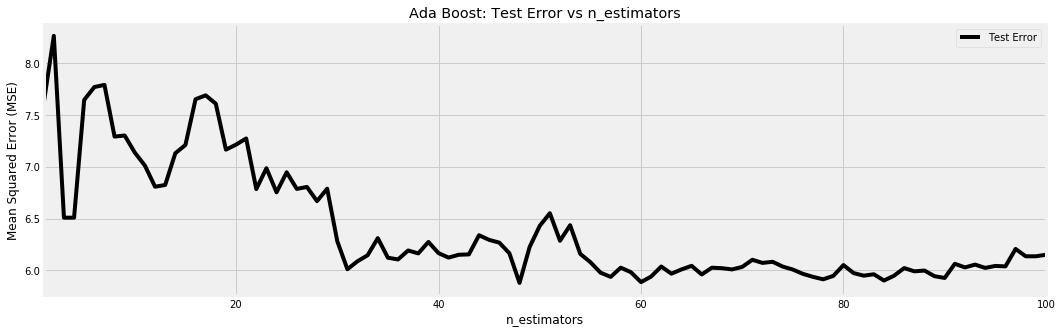

In [1035]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5), sharey=True)

pd.DataFrame(
    [
        (n, mean_squared_error(y_test, y_pred_staged))
        for n, y_pred_staged in enumerate(rgr.staged_predict(x_test), 1)
    ],
    columns=['n', 'Test Error']
).set_index('n').plot(
    title=f'Ada Boost: Test Error vs n_estimators',
    kind='line',
    color='k',
    linestyle='-',
    ax=ax
)

ax.set_xlabel('n_estimators')
ax.set_ylabel('Mean Squared Error (MSE)')

fig.show()


## Random Trees Embedding

In [603]:
from sklearn.ensemble import RandomTreesEmbedding
from sklearn.linear_model import Ridge

rgr = make_pipeline(RandomTreesEmbedding(), Ridge())
rgr.fit(x_train, y_train)
y_test_pred = rgr.predict(x_test)

print(f'MSE: {mean_squared_error(y_test, y_test_pred)}')

MSE: 3.899599726541862


In [605]:
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, median_absolute_error, r2_score
)

print(
    'R2: {:.2f}, MSE: {:.2f}, MAE: {:.2f}'.format(
        r2_score(y_test, y_test_pred),
        mean_squared_error(y_test, y_test_pred),
        mean_absolute_error(y_test, y_test_pred),
    )
)

R2: 0.92, MSE: 3.90, MAE: 1.40


/Users/tarek/anaconda3/envs/scikitbook/lib/python3.6/site-packages/ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


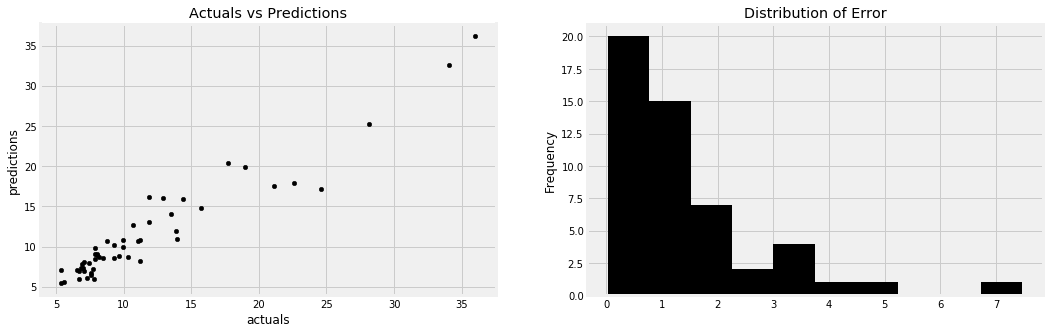

In [604]:
df_pred = pd.DataFrame(
    {
        'actuals': y_test,
        'predictions': y_test_pred,
    }
)

df_pred['error'] = np.abs(y_test - y_test_pred)

fig, axs = plt.subplots(1, 2, figsize=(16, 5), sharey=False)

df_pred.plot(
    title='Actuals vs Predictions',
    kind='scatter',
    x='actuals',
    y='predictions',
    color='k',
    ax=axs[0],
)

df_pred['error'].plot(
    title='Distribution of Error',
    kind='hist',
    color='k',
    ax=axs[1],
)

fig.show()